In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
import pandas as pd
df_train = pd.read_csv('/content/trainset.csv')
df_test = pd.read_csv('/content/testset.csv')

In [ ]:
train_prices = df_train['Close'].values.reshape(-1, 1)
test_prices = df_test['Close'].values.reshape(-1, 1)

In [ ]:
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_prices)
scaled_test = scaler.transform(test_prices)

In [ ]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences(scaled_train, seq_length)
x_test, y_test = create_sequences(scaled_test, seq_length)

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1199, 60, 1), (1199, 1), (65, 60, 1), (65, 1))

In [ ]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


In [ ]:
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [ ]:
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(RNNModel, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.rnn(x, h0)

        # Last time step
        out = out[:, -1, :]
        out = self.fc(out)
        return out

In [ ]:
model = RNNModel()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [ ]:
!pip install torchinfo

In [ ]:
from torchinfo import summary

# input_size = (batch_size, seq_len, input_size)
summary(model, input_size=(64, 60, 1))

Layer (type:depth-idx)                   Output Shape              Param #
RNNModel                                 [64, 1]                   --
├─RNN: 1-1                               [64, 60, 50]              7,750
├─Linear: 1-2                            [64, 1]                   51
Total params: 7,801
Trainable params: 7,801
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 29.76
Input size (MB): 0.02
Forward/backward pass size (MB): 1.54
Params size (MB): 0.03
Estimated Total Size (MB): 1.58

In [ ]:
model = RNNModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Necessary imports (from aneBHdltRYXY)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

# Code to get scaled data (from dgIMtEwGSIQe)
# train_prices and test_prices are assumed to be available from earlier execution or kernel state.
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(train_prices)
scaled_test = scaler.transform(test_prices)

# Code to create sequences (from H0hLoyaBSL_5)
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 60
x_train, y_train = create_sequences(scaled_train, seq_length)
x_test, y_test = create_sequences(scaled_test, seq_length)

# Code to convert to tensors (from m0mOqWUNSS_e)
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Code to create DataLoader (from NW-sdUHWSX8h)
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Code to define RNNModel (from __Jiv8IOSbaY)
class RNNModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=50, num_layers=2, output_size=1):
        super(RNNModel, self).__init__()

        self.hidden_size = hidden_size
        self.num_layers = num_layers

        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

        out, _ = self.rnn(x, h0)

        # Last time step
        out = out[:, -1, :]
        out = self.fc(out)
        return out

# Code to instantiate model, criterion, optimizer (from 9e5rWBONTF9t)
model = RNNModel()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Original training loop code
epochs = 20

train_losses = [] # Initialize list to store losses

for epoch in range(epochs):
    for x_batch, y_batch in train_loader:
        outputs = model(x_batch)
        loss = criterion(outputs, y_batch)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    train_losses.append(loss.item()) # Append loss after each epoch
    print(f"Epoch {epoch+1}, Loss: {loss.item():.6f}")

Epoch 1, Loss: 0.028422
Epoch 2, Loss: 0.002517
Epoch 3, Loss: 0.001867
Epoch 4, Loss: 0.000547
Epoch 5, Loss: 0.000557
Epoch 6, Loss: 0.000323
Epoch 7, Loss: 0.000384
Epoch 8, Loss: 0.000611
Epoch 9, Loss: 0.000447
Epoch 10, Loss: 0.000483
Epoch 11, Loss: 0.000400
Epoch 12, Loss: 0.000384
Epoch 13, Loss: 0.000320
Epoch 14, Loss: 0.000225
Epoch 15, Loss: 0.000413
Epoch 16, Loss: 0.000213
Epoch 17, Loss: 0.000214
Epoch 18, Loss: 0.000359
Epoch 19, Loss: 0.000230
Epoch 20, Loss: 0.000264


Name:RANJIT R
Register Number: 212224240131


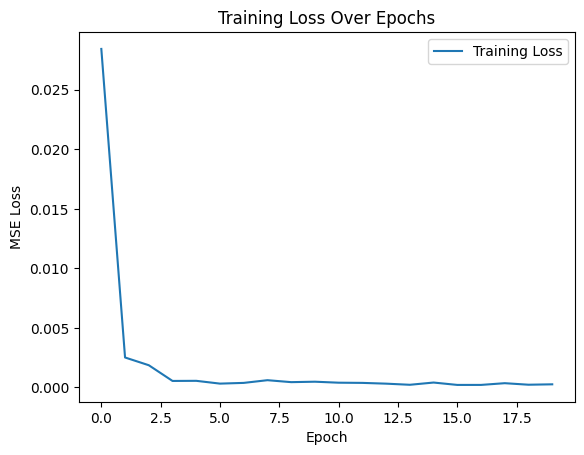

In [ ]:
import matplotlib.pyplot as plt

print('Name:RANJIT R')
print('Register Number: 212224240131')
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

Name: RANJIT R
Register Number: 212224240131


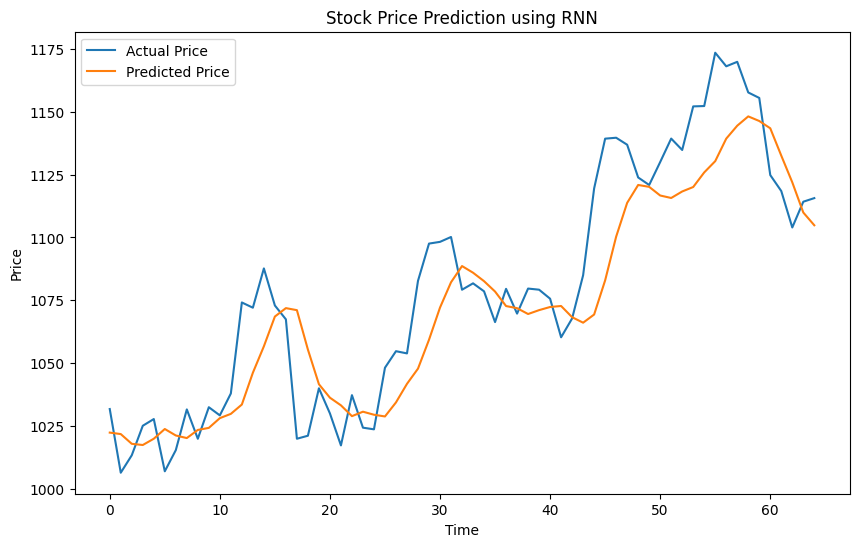

Predicted Price: [1104.8514]
Actual Price: [1115.65]


In [ ]:
## Step 4: Make Predictions on Test Set
model.eval()
with torch.no_grad():
    predicted = model(x_test_tensor.to(device)).cpu().numpy()
    actual = y_test_tensor.cpu().numpy()

# Inverse transform the predictions and actual values
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(actual)

# Plot the predictions vs actual prices
print('Name: RANJIT R')
print('Register Number: 212224240131')
plt.figure(figsize=(10, 6))
plt.plot(actual_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price Prediction using RNN')
plt.legend()
plt.show()
print(f'Predicted Price: {predicted_prices[-1]}')
print(f'Actual Price: {actual_prices[-1]}')